# Star Jeans Data Analysis

## 0.0. Imports

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
from IPython.core.display import HTML

### 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings() 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.2. Loading Data


In [3]:
path = '/home/mars/repos/StarJeans/projeto_final/'
database_name = 'database_hm01.sqlite'
conn = create_engine( 'sqlite:///' + path + database_name, echo=False )

In [4]:
query = """
    SELECT * FROM vitrine
"""

In [5]:
df_raw = pd.read_sql( query, con=conn )

## 1.0. Data Description

In [6]:
df01 = df_raw.copy()

### 1.1. Data Dimensions

In [7]:
print( 'Number of Rows: {}'.format( df01.shape[0] ) )
print( 'Number of Cols: {}'.format( df01.shape[1] ) )

Number of Rows: 606
Number of Cols: 13


### 1.2. Data Types

In [8]:
df01.dtypes

product_id          object
style_id            object
color_id            object
product_name        object
color_name          object
fit                 object
product_price      float64
size_number         object
size_leg            object
cotton             float64
polyester          float64
spandex            float64
scrapy_datetime     object
dtype: object

In [9]:
# convert object to datetime
df01['scrapy_datetime'] = pd.to_datetime( df01['scrapy_datetime'] )

### 1.3. Check NA

In [10]:
df01.head(10)

,product_id,style_id,color_id,product_name,color_name,fit,product_price,size_number,size_leg,cotton,polyester,spandex,scrapy_datetime
0,1024256001,1024256,001,slim_jeans,black,slim_fit,19.99,None,None,0.99,0.65,0.01,2022-04-23 06:04:44
1,1024256002,1024256,002,slim_jeans,light_denim_blue,slim_fit,19.99,None,None,0.99,0.65,0.01,2022-04-23 06:04:44
2,1024256003,1024256,003,slim_jeans,light_denim_blue,slim_fit,19.99,None,None,0.99,0.65,0.01,2022-04-23 06:04:44
3,1024256004,1024256,004,slim_jeans,denim_blue,slim_fit,19.99,None,None,0.99,0.65,0.01,2022-04-23 06:04:44
4,1024256005,1024256,005,slim_jeans,dark_blue,slim_fit,19.99,None,None,0.99,0.65,0.01,2022-04-23 06:04:44
5,1024256006,1024256,006,slim_jeans,dark_denim_blue,slim_fit,19.99,None,None,1.00,0.00,0.01,2022-04-23 06:04:44
6,1024256007,1024256,007,slim_jeans,dark_gray,slim_fit,19.99,None,None,0.99,0.65,0.01,2022-04-23 06:04:44
7,1024256008,1024256,008,slim_jeans,white,slim_fit,19.99,None,None,1.00,0.00,0.01,2022-04-23 06:04:44
8,0938875002,0938875,002,slim_tapered_jeans,white,slim_fit,39.99,None,None,1.00,0.00,0.01,2022-04-23 06:04:44
9,0938875001,0938875,001,slim_tapered_jeans,light_denim_blue,slim_fit,29.99,None,None,1.00,0.00,0.01,2022-04-23 06:04:44


In [11]:
df01.isna().sum()

product_id           0
style_id             0
color_id             0
product_name         0
color_name           0
fit                  3
product_price        0
size_number        492
size_leg           492
cotton               0
polyester            0
spandex              0
scrapy_datetime      0
dtype: int64

In [12]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product_id       606 non-null    object        
 1   style_id         606 non-null    object        
 2   color_id         606 non-null    object        
 3   product_name     606 non-null    object        
 4   color_name       606 non-null    object        
 5   fit              603 non-null    object        
 6   product_price    606 non-null    float64       
 7   size_number      114 non-null    object        
 8   size_leg         114 non-null    object        
 9   cotton           606 non-null    float64       
 10  polyester        606 non-null    float64       
 11  spandex          606 non-null    float64       
 12  scrapy_datetime  606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 61.7+ KB


In [13]:
df01.isna().sum() / df01.shape[0]

product_id         0.000000
style_id           0.000000
color_id           0.000000
product_name       0.000000
color_name         0.000000
fit                0.004950
product_price      0.000000
size_number        0.811881
size_leg           0.811881
cotton             0.000000
polyester          0.000000
spandex            0.000000
scrapy_datetime    0.000000
dtype: float64

### 1.4. Removing NA

In [14]:
df01 = df01.drop( columns = ['size_number', 'size_leg'] ).dropna()

### 1.5. Descriptive Statistical

In [15]:
num_attributes = df01.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df01.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### 1.5.1. Numerical Attributes

In [16]:
# Metricas de tendencia central: Media, Mediana
t1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
t2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Metricas de dispersao: STD, MIN, MAX, RANGE, SKEW
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concat
m1 = pd.concat( [d2, d3, d4, t1, t2, d1, d5, d6]).T.reset_index()
m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,product_price,7.99,49.99,42.00,27.208905,27.99,9.310660,0.449952,-0.387062
1,cotton,0.72,1.00,0.28,0.970945,0.99,0.055122,-2.652726,6.624648
2,polyester,0.00,1.00,1.00,0.251095,0.00,0.321253,0.684549,-1.273506
3,spandex,0.00,0.02,0.02,0.010647,0.01,0.007667,-0.110445,-1.293136


In [17]:
df01.describe()

,product_price,cotton,polyester,spandex
count,603.000000,603.000000,603.000000,603.000000
mean,27.208905,0.970945,0.251095,0.010647
std,9.318390,0.055168,0.321520,0.007674
min,7.990000,0.720000,0.000000,0.000000
25%,19.990000,0.980000,0.000000,0.000000
50%,27.990000,0.990000,0.000000,0.010000
75%,29.990000,1.000000,0.650000,0.020000
max,49.990000,1.000000,1.000000,0.020000


#### 1.5.2. Categorical Data

In [18]:
cat_attributes.nunique()

product_id      187
style_id         28
color_id         37
product_name     20
color_name       38
fit               5
dtype: int64

## 2.0 Data Visualization

In [19]:
df02 = df01.drop_duplicates()

### 2.1 Product x Price

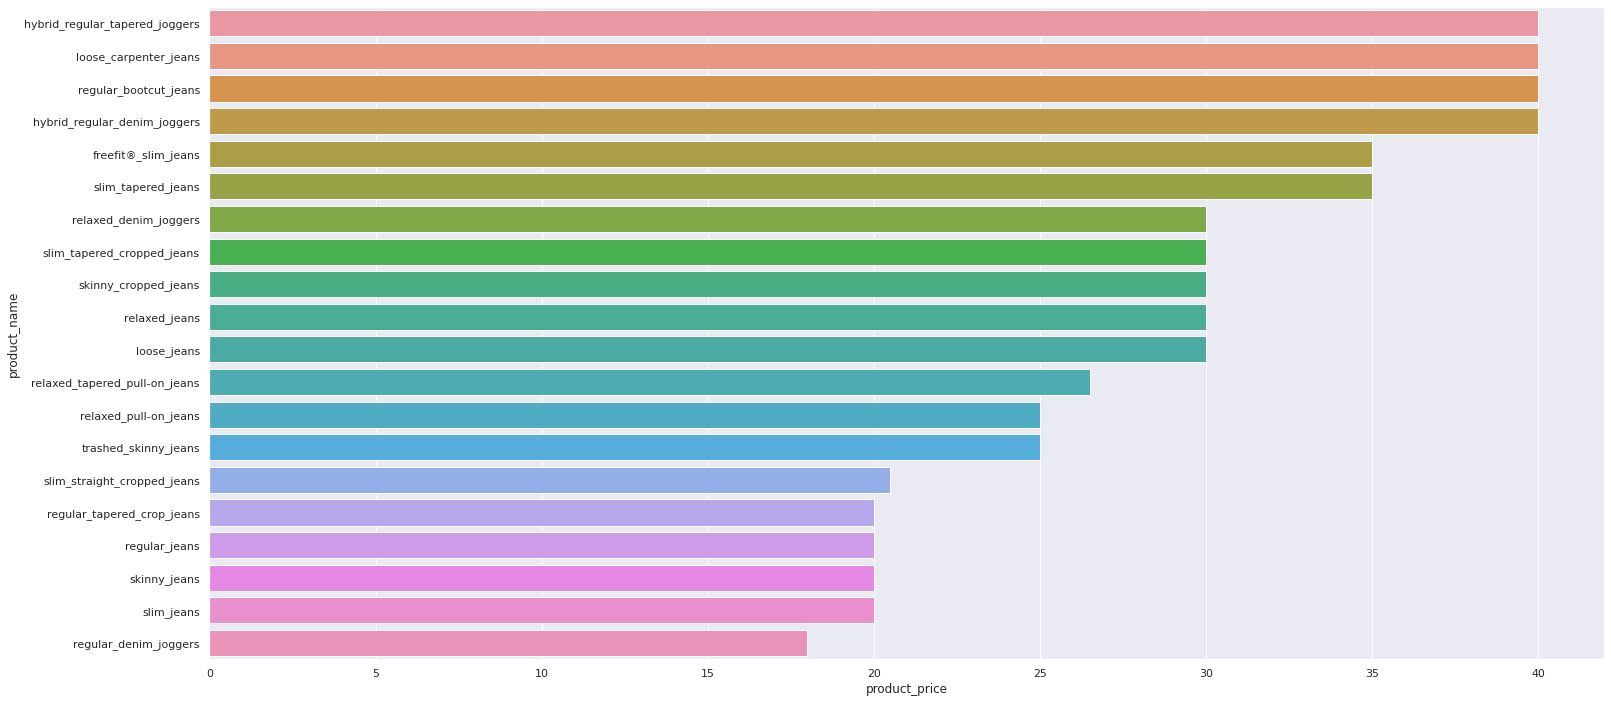

In [20]:
aux1 = df02.groupby('product_name')['product_price'].median().reset_index().sort_values('product_price', ascending=False)
sns.barplot( x='product_price', y='product_name', data=aux1);

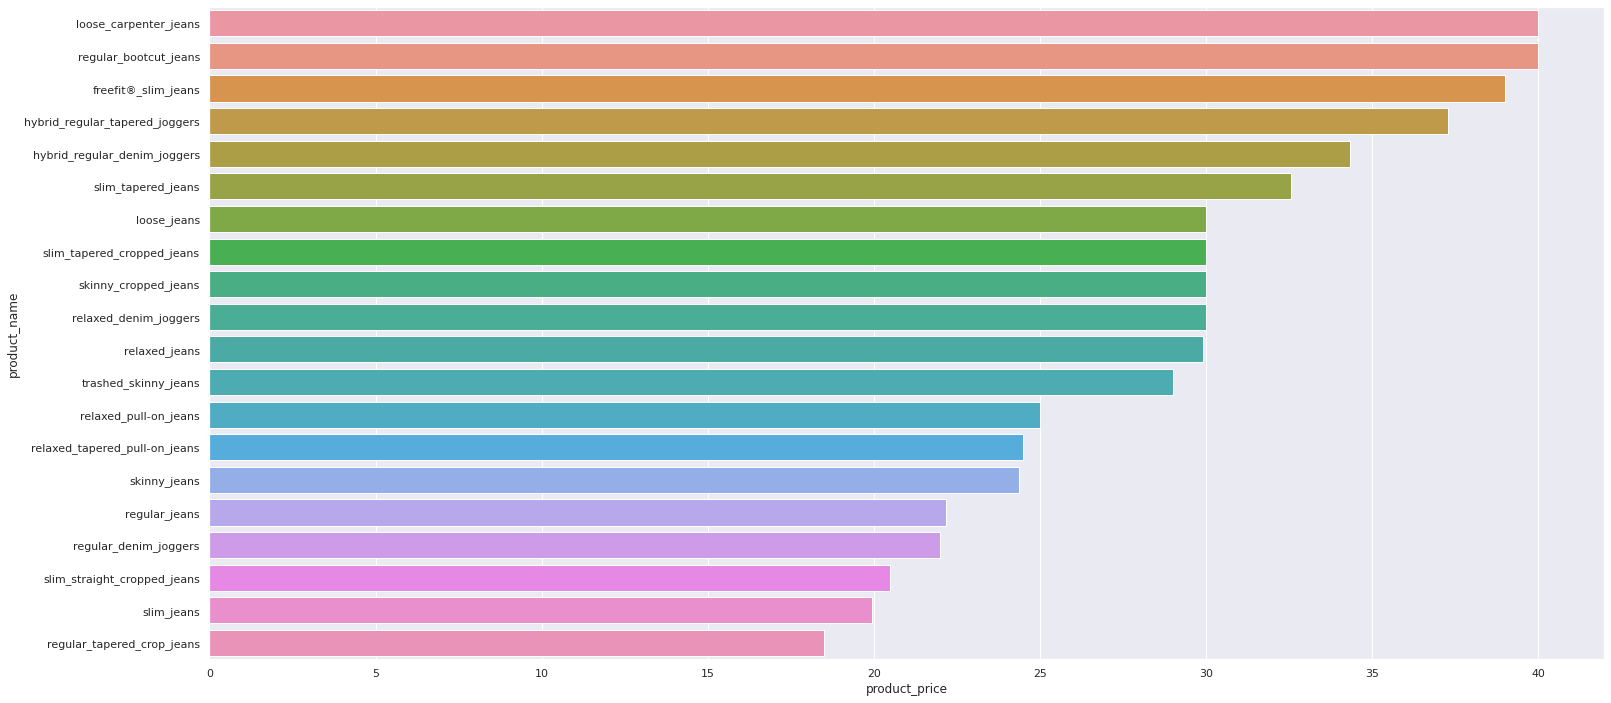

In [21]:
aux2 = df02.groupby('product_name')['product_price'].mean().reset_index().sort_values('product_price', ascending=False)
sns.barplot( x='product_price', y='product_name', data=aux2);

In [22]:
aux1.columns = ['product_name', 'median']
aux2.columns = ['product_name', 'mean']

table1 = pd.merge(aux1, aux2)
table1

,product_name,median,mean
0,hybrid_regular_tapered_joggers,39.99,37.275714
1,loose_carpenter_jeans,39.99,39.990000
2,regular_bootcut_jeans,39.99,39.990000
3,hybrid_regular_denim_joggers,39.99,34.323333
4,freefit®_slim_jeans,34.99,38.990000
5,slim_tapered_jeans,34.99,32.561429
6,relaxed_denim_joggers,29.99,29.990000
7,slim_tapered_cropped_jeans,29.99,29.990000
8,skinny_cropped_jeans,29.99,29.990000
9,relaxed_jeans,29.99,29.918571


### 2.2 Product x Number of products

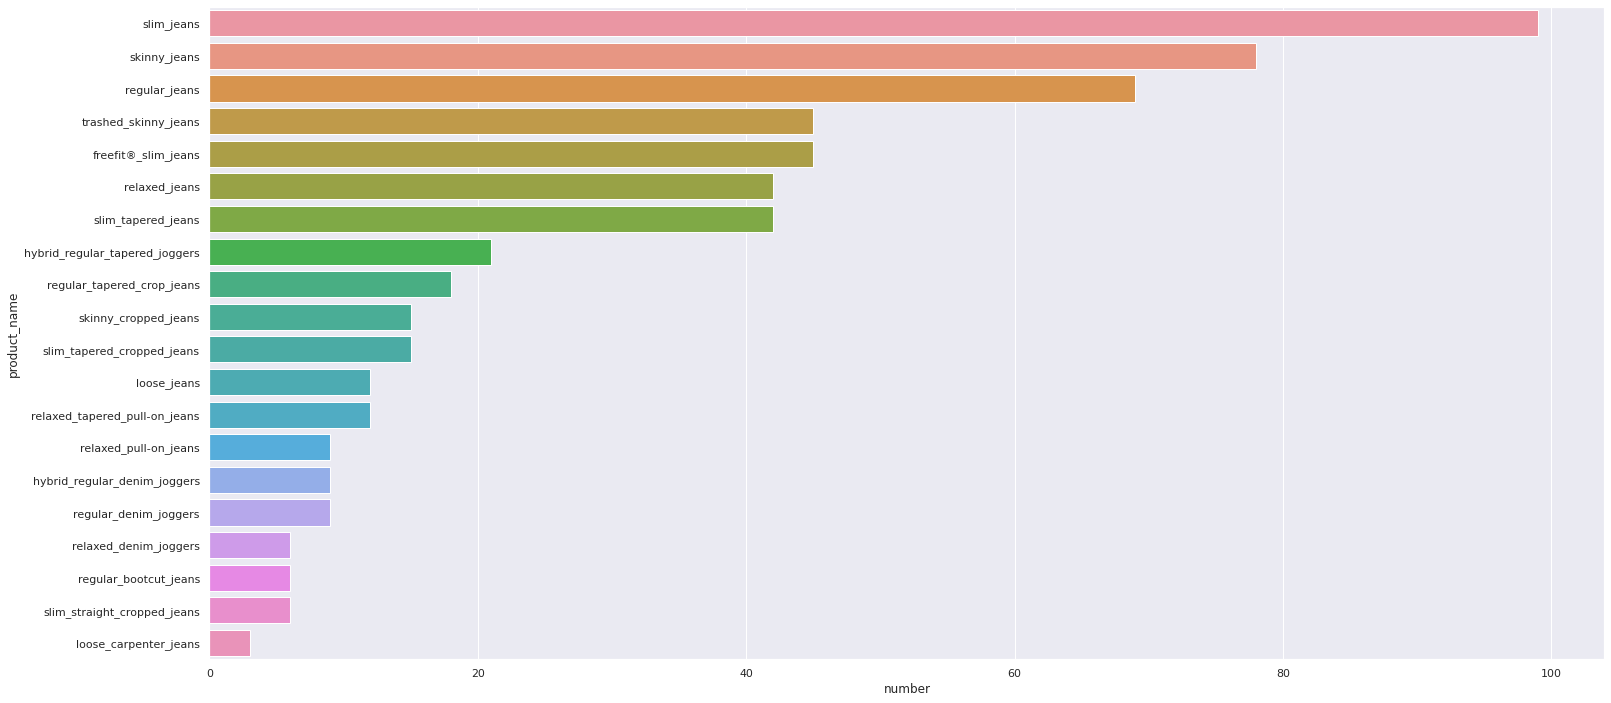

In [23]:
aux3 = pd.DataFrame(df02['product_name'].value_counts()).reset_index()
aux3.columns = ['product_name', 'number']
sns.barplot(x='number', y='product_name', data=aux3);

## 2.3 Colors X Numbers

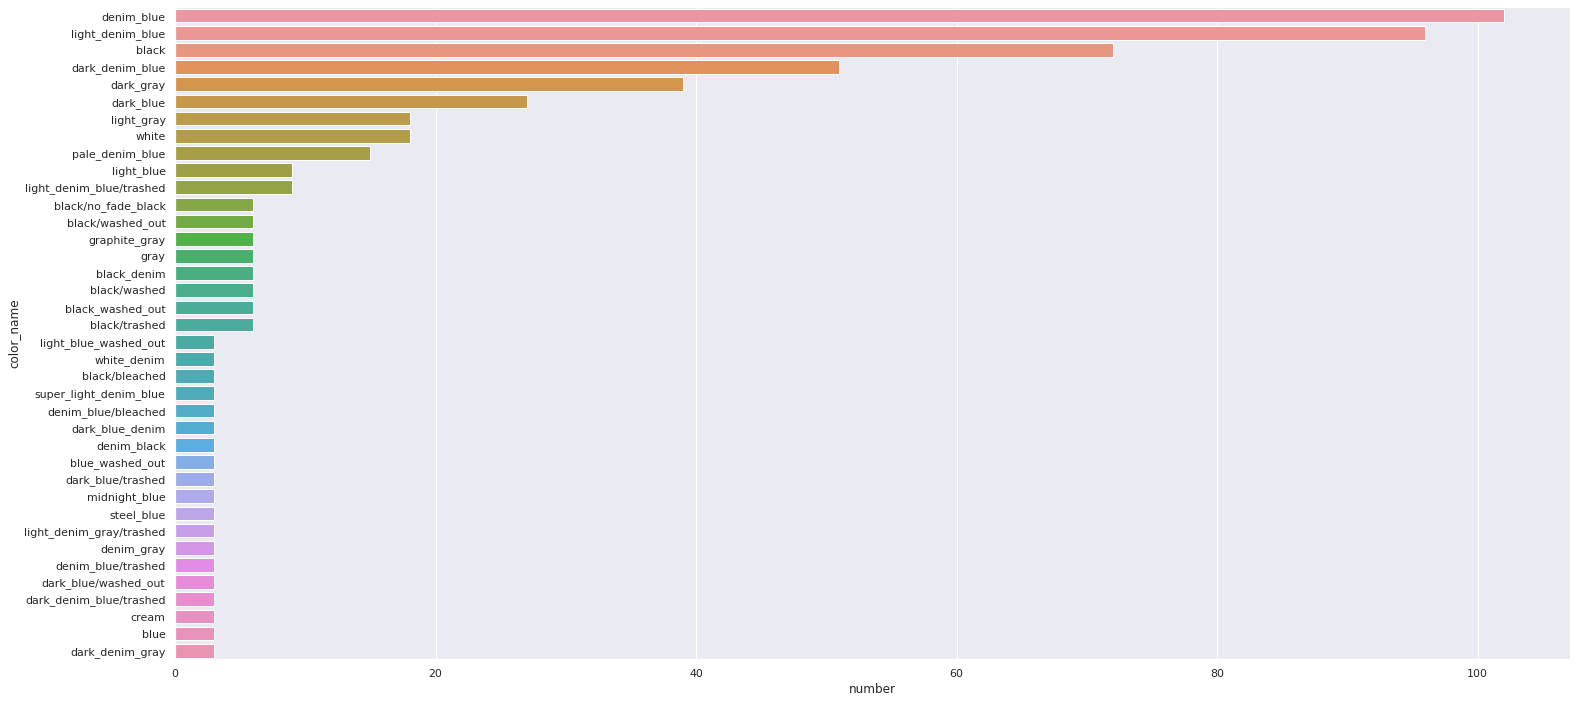

In [24]:
aux4 = pd.DataFrame(df02['color_name'].value_counts()).reset_index()
aux4.columns = ['color_name', 'number']
sns.barplot(x='number', y='color_name', data=aux4);

# DASHBOARD StarJeans

In [25]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

## Pipelines

In [38]:
# Make DataFrame Pipeline Interactive

# all dataset
idf = df02.interactive()

# Value Counts Barplot
df03 = df02[['product_id', 'product_name', 'color_name']]
df03.columns = ['value_counts', 'product_name', 'color_name']
df03 = df03.reset_index( drop=True )
idf_value_counts = df03.interactive()

# Table
df04 = pd.merge(table1, aux3)
df04.columns = ['product_name', 'median', 'mean', 'value_counts']
df04 = df04.sort_values(['median', 'value_counts'], ascending=False ).reset_index(drop=True )
idf_table = df04.interactive()

## Define Panel Widgets

### Barplot Value counts

In [27]:
y_axis = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['product_name', 'color_name'],
    button_type='success'
)

In [28]:
barplot_pipeline = (
    idf_value_counts.groupby(y_axis)['value_counts'].count()
    .to_frame()
    .reset_index()
    .sort_values(by='value_counts', ascending=False )
    .reset_index( drop=True ).head(15)
)

In [29]:
bar_plot = barplot_pipeline.hvplot(kind='bar', 
                                       x=y_axis, 
                                       y='value_counts', 
                                       title='Values Counts',
                                       rot=60,
                                       height=500
                                       )
bar_plot

### Response Table

In [40]:
response_table = idf_table.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 16, sizing_mode='stretch_width')
response_table

### All DataSet Table

In [31]:
data_table = idf.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')
data_table

## Creating Dashboard

#Layout using Template
template = pn.template.FastListTemplate(
    title='Star Jeans', 
    sidebar=[pn.pane.Markdown("# Star Jeans Dashboard"), 
             pn.pane.Markdown("#### This is the dashboard of jeans data."), 
             pn.pane.JPG('dashboard/jeans.jpg', sizing_mode='stretch_height')],
    main=[pn.Row(pn.Column(y_axis_price, 
                           price_bar_plot.panel(width=700), margin=(0,25)), 
                 table_product.panel(width=605)), 
          pn.Row(table.panel(width=700), margin=(0,25))],
    accent_base_color="#4f6bb3",
    header_background="#000f35",
)
template.show()

In [41]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Star Jeans', 
    sidebar=[pn.pane.Markdown("# Star Jeans Dashboard"), 
             pn.pane.Markdown("#### Neste dashboard encontra-se o resultado da coleta de dados sobre calças jeans masculinas para a Star Jeans.\n#### No gráfico de barras, você encontra a relevância dos tipos de calças e de cores.\n#### Na tabela à direita temos as médias e medianas dos preços por tipo de calças.\n#### E na tabela abaixo os dados que foram coletados e tratados."), 
             pn.pane.JPG('img/jeans.jpg', sizing_mode='stretch_width')],
    main=[pn.Row(pn.Column(y_axis, 
                           bar_plot.panel(width=600), margin=(0,25)), 
                 response_table.panel(width=600)), 
          pn.Row(data_table.panel(width=1225), margin=(0,25))],
    accent_base_color="#4f6bb3",
    header_background="#000f35",
    theme_toggle=False,
)
template.show()

Launching server at http://localhost:44503
